In [ ]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\Puja Kurde\OneDrive\Desktop\student_depression_dataset.csv"
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# Check data types & missing values
df.info()

# Check summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [3]:
df.drop(["id", "City", "Profession"], axis=1, inplace=True)


In [4]:
target_column = "Depression"
y = df[target_column]
X = df.drop(target_column, axis=1)


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

X.head()


,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0
1,0,24.0,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1
2,1,31.0,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1
3,0,28.0,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1
4,0,25.0,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0


In [6]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {acc:.4f}")


Random Forest: Accuracy = 0.8283
XGBoost: Accuracy = 0.8237
SVM: Accuracy = 0.8348


In [13]:
from sklearn.metrics import classification_report

y_pred_rf = models["Random Forest"].predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

y_pred_xgb = models["XGBoost"].predict(X_test)
print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.82      0.82      5581



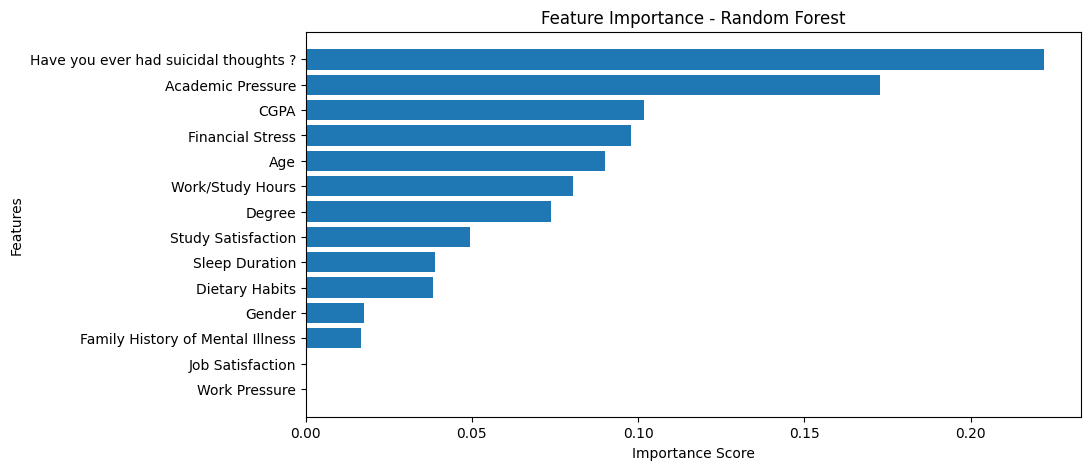

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = models["Random Forest"].feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [15]:
print(X.dtypes)


Gender                                     int32
Age                                      float64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                           int32
Family History of Mental Illness           int32
dtype: object


In [10]:
print(X.isnull().sum())


Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64


In [11]:
X = X.drop(columns=["Work Pressure", "Job Satisfaction"])


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use X_scaled for SVM


In [13]:
#train additional models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
log_reg = LogisticRegression()
grad_boost = GradientBoostingClassifier()

# Train
log_reg.fit(X_train, y_train)
grad_boost.fit(X_train, y_train)

# Predictions
log_pred = log_reg.predict(X_test)
grad_pred = grad_boost.predict(X_test)

# Accuracy
print("Logistic Regression:", accuracy_score(y_test, log_pred))
print("Gradient Boosting:", accuracy_score(y_test, grad_pred))


Logistic Regression: 0.83730514244759
Gradient Boosting: 0.8364092456549006


In [14]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Output results
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': 20, 'n_estimators': 150}
Best Score: 0.9583333333333334


In [15]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, "best_model.pkl")
print("Model saved successfully!")

Model saved successfully!
